In [6]:
import os

import glob
     
from IPython.display import Image, display

In [7]:
from IPython import display
     

display.clear_output()

In [8]:
from IPython import display
     

display.clear_output()

In [9]:
!nvidia-smi

Thu Jan  2 18:07:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
HOME = os.getcwd()
     

print(HOME)

/kaggle/working


In [11]:
!pip install ultralytics

In [12]:
import ultralytics
     

ultralytics.checks()

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="hMy9moATp2etps0iwcok")
project = rf.workspace("dwz").project("zebracrossing-g9vao-y5kkw")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to zebracrossing-1 in yolov8:: 100%|██████████| 6303/6303 [00:00<00:00, 6571.58it/s]


In [15]:
%cd {HOME}
%cd {dataset.location}

/kaggle/working
/kaggle/working/datasets/zebracrossing-1


In [16]:
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 name=final_training save=True

100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 287MB/s]
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/zebracrossing-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=final_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

In [17]:
from IPython.display import FileLink

# Specify the path to your best.pt file
file_path = 'runs/detect/final_training/weights/best.pt'

# Display a download link
FileLink(file_path)


/kaggle/working/datasets/zebracrossing-1/runs/detect/final_training/weights/best.pt

/kaggle/working


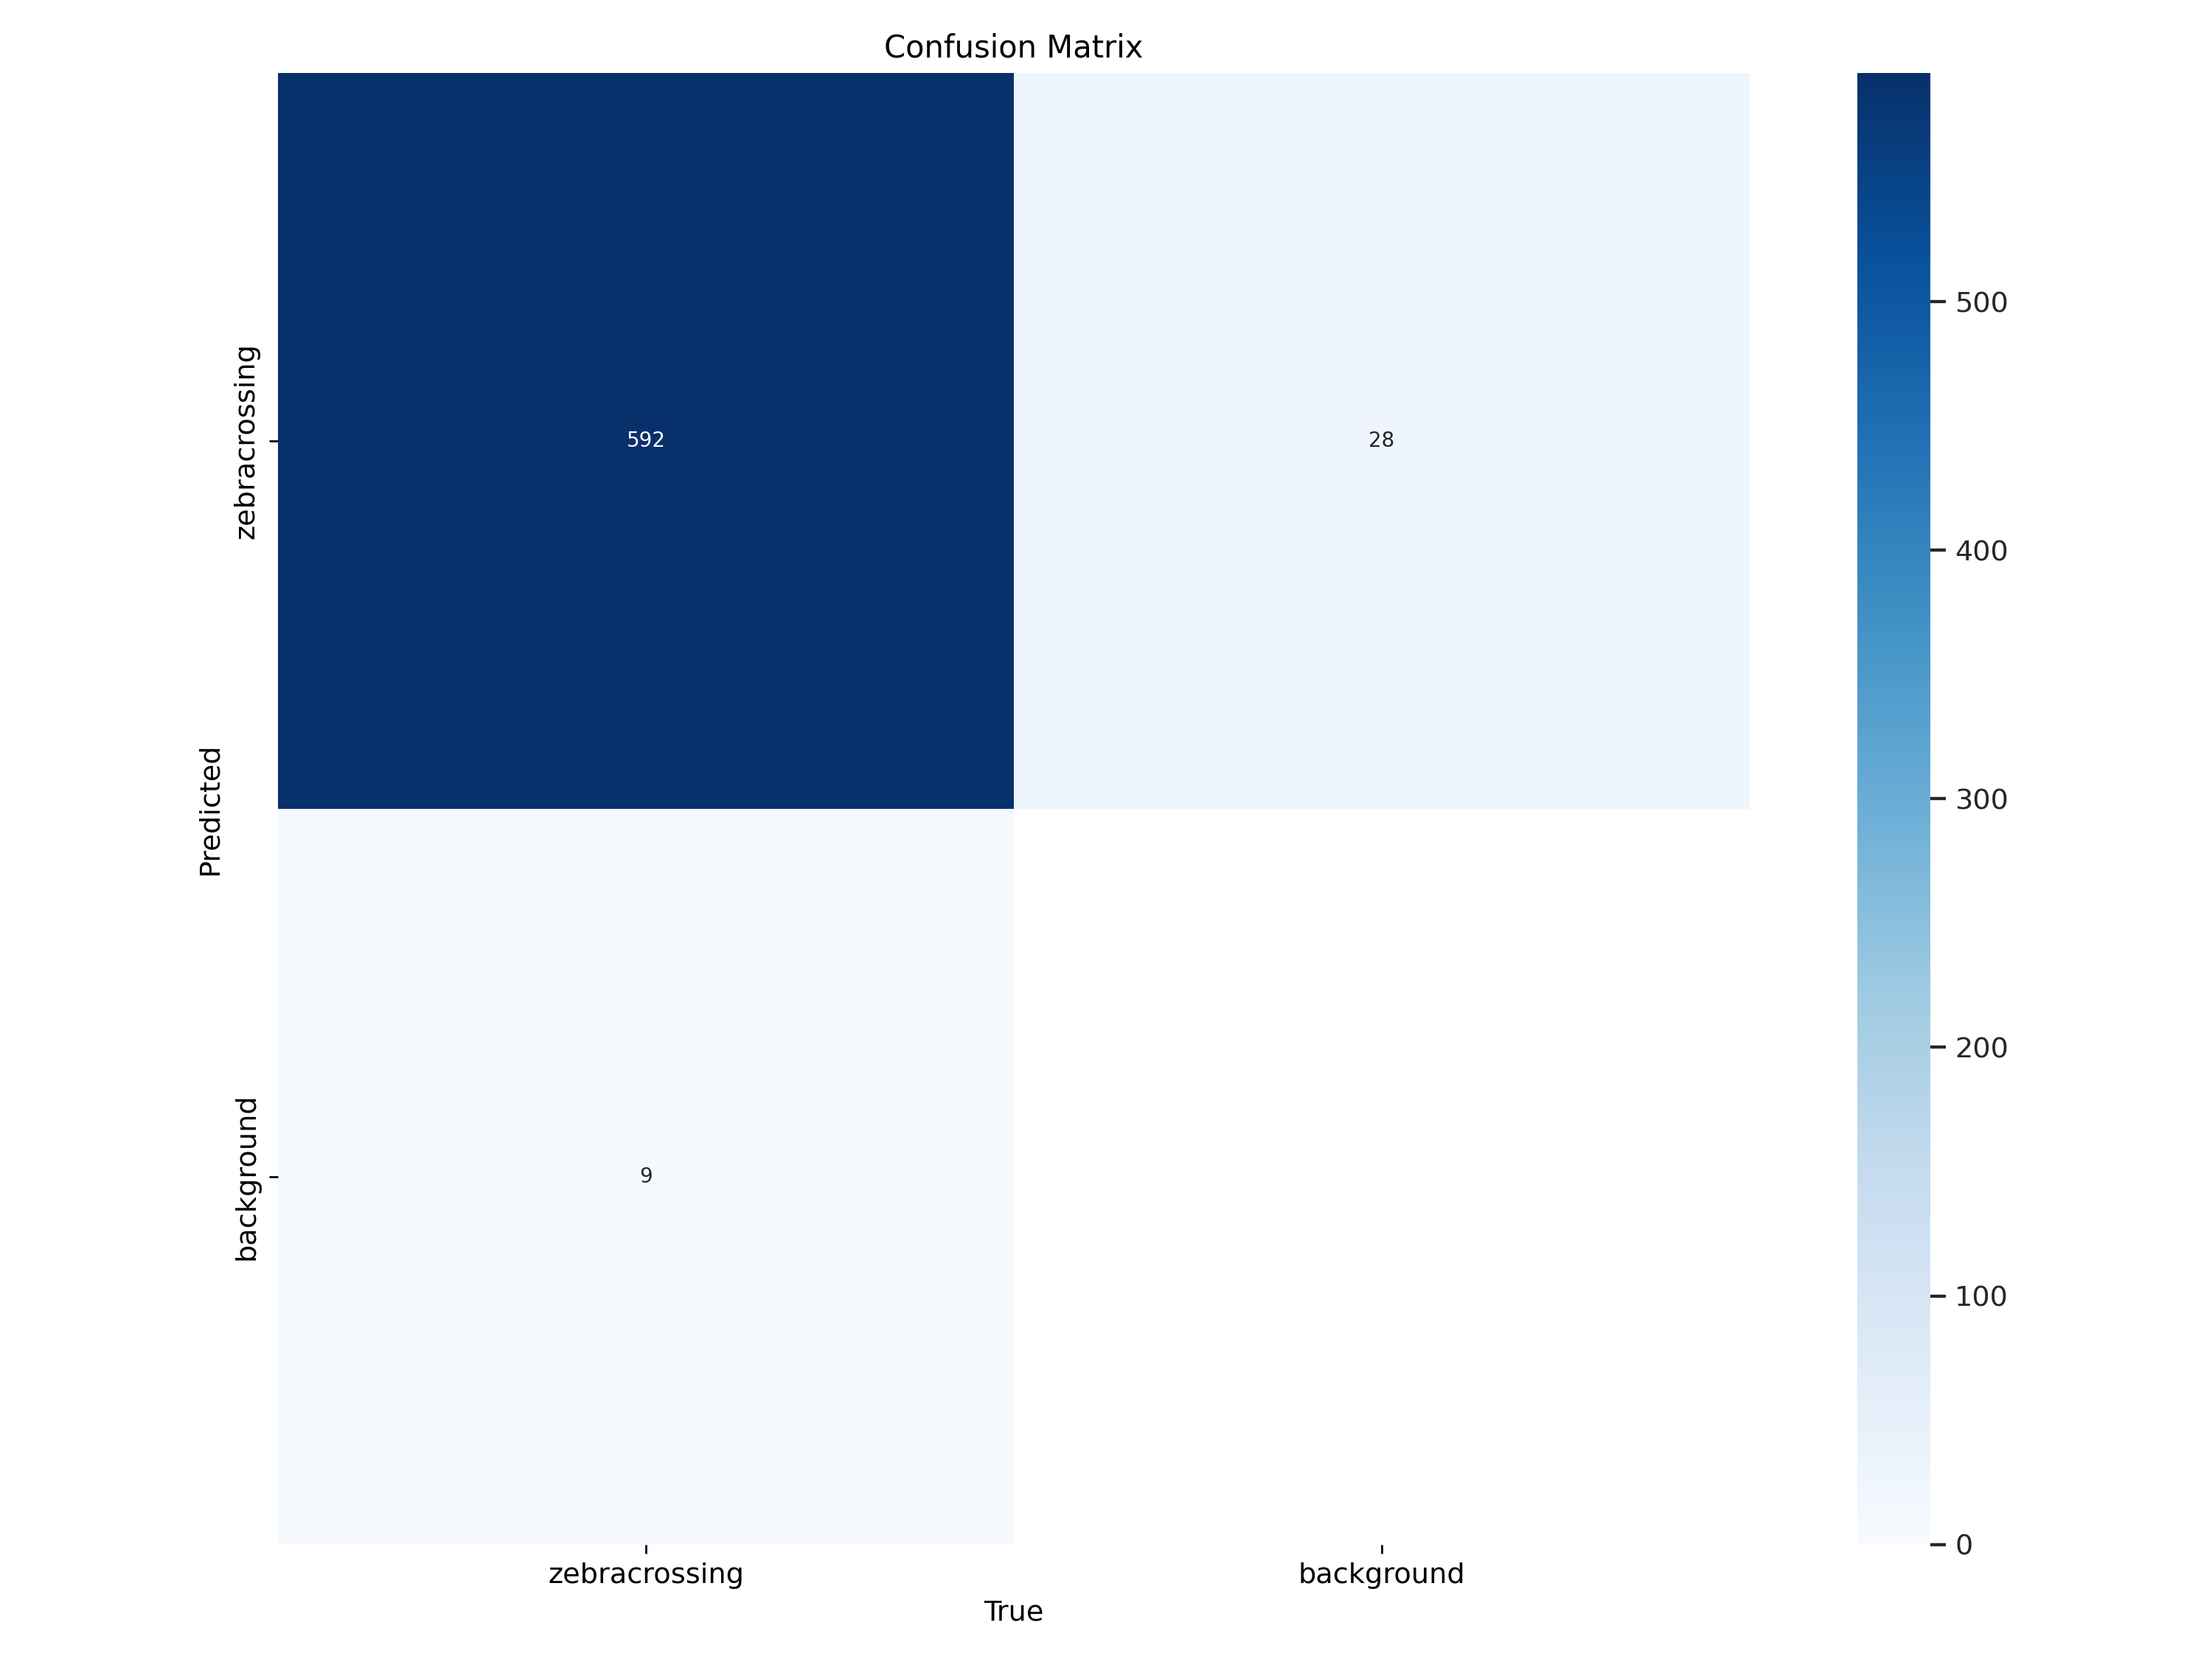

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/zebracrossing-1/runs/detect/final_training/confusion_matrix.png', width=900)

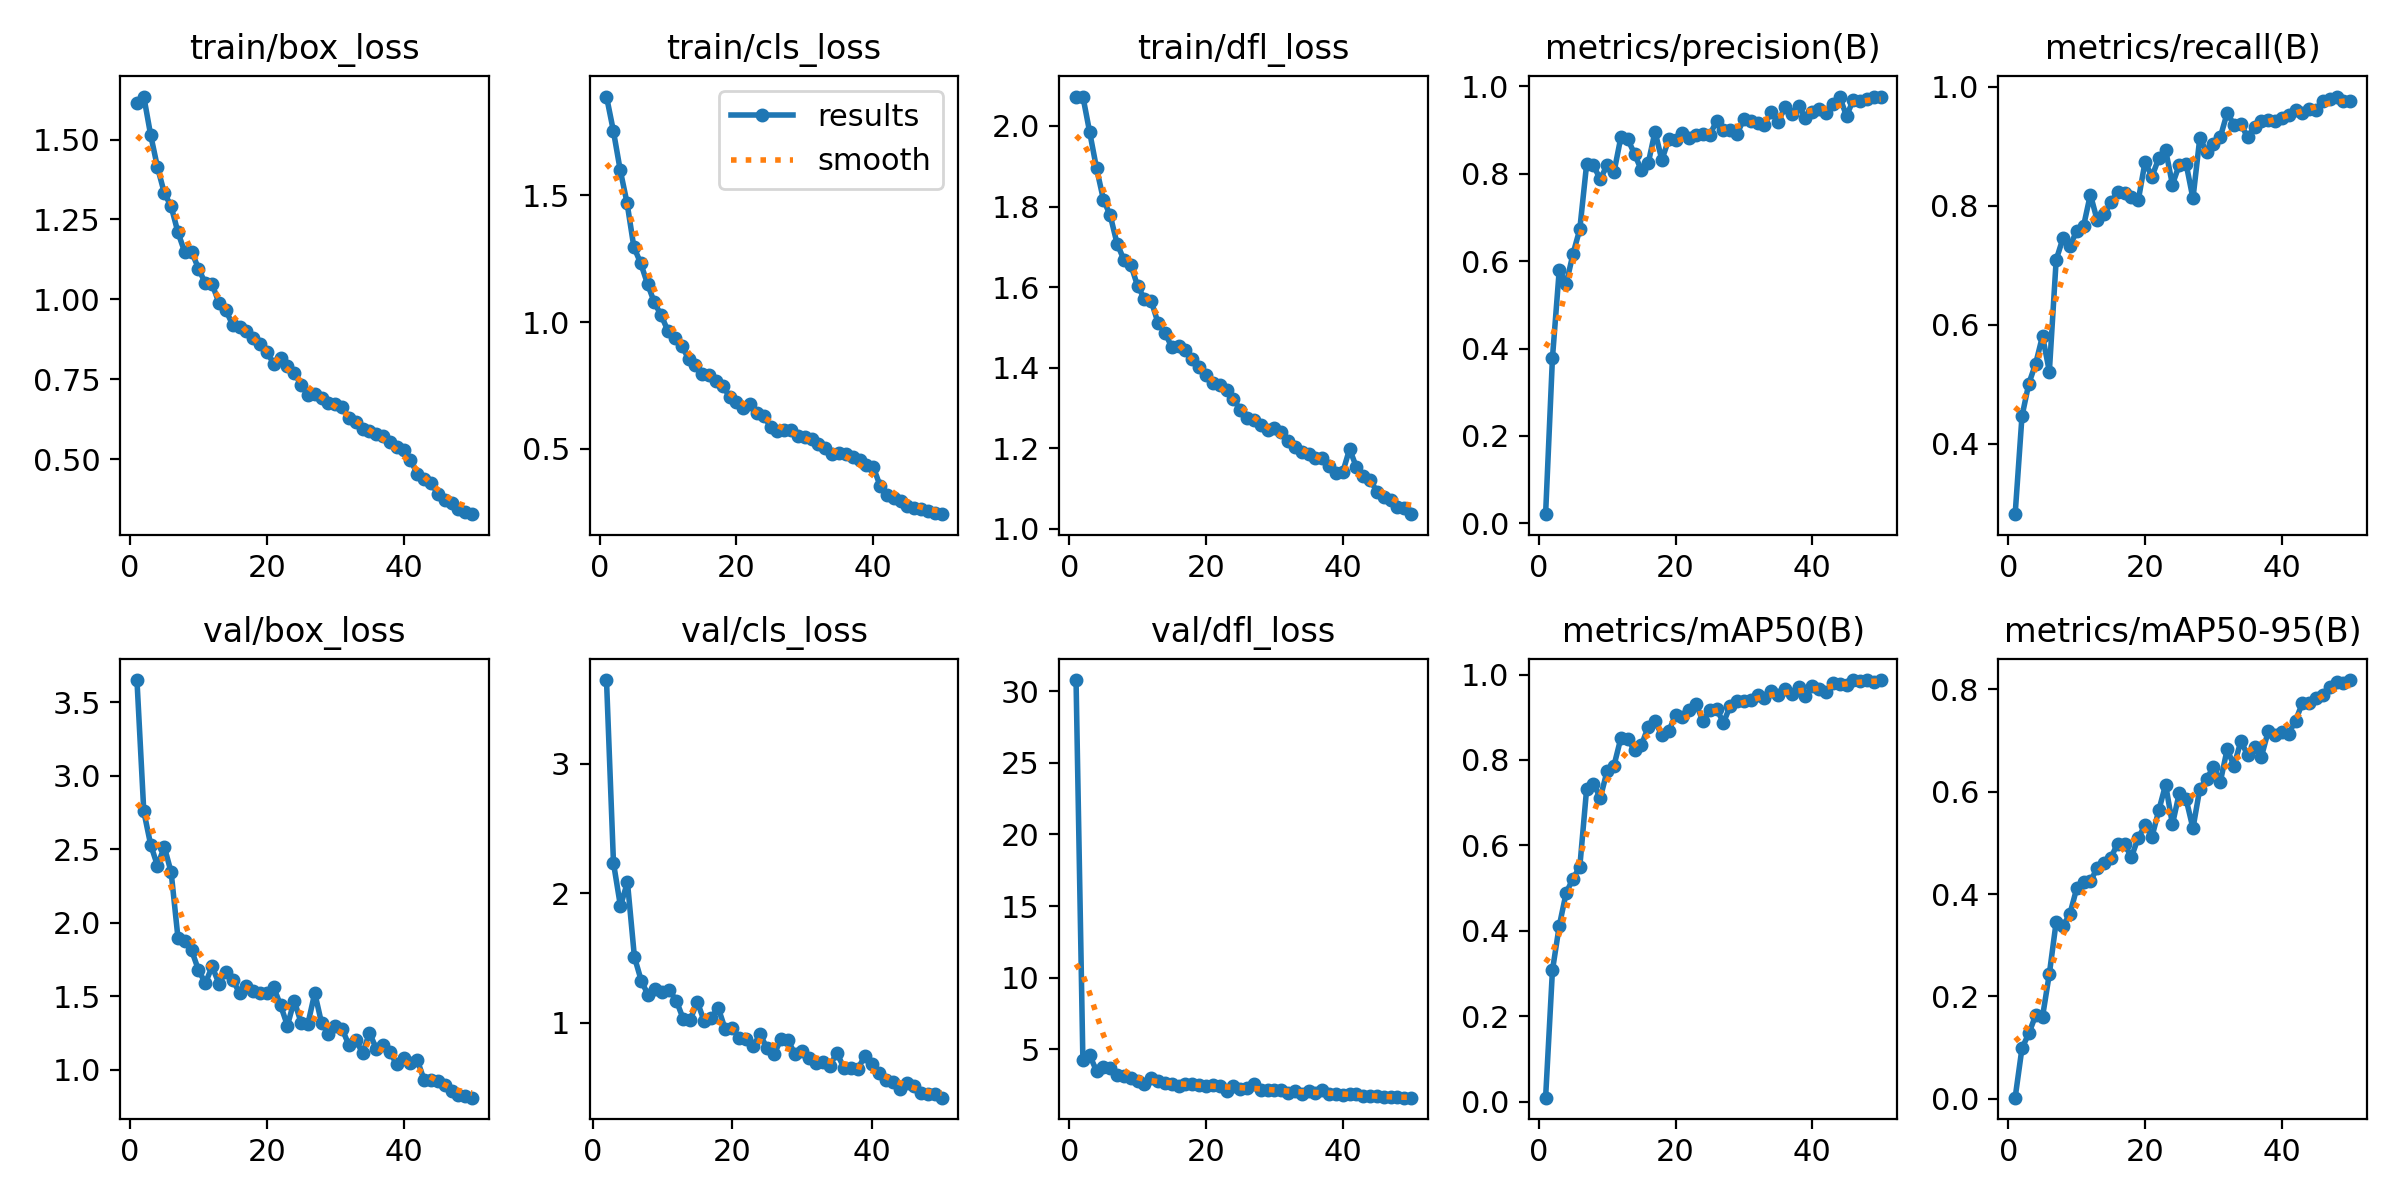

In [24]:
Image(filename=f'{HOME}/datasets/zebracrossing-1/runs/detect/final_training/results.png', width=900)

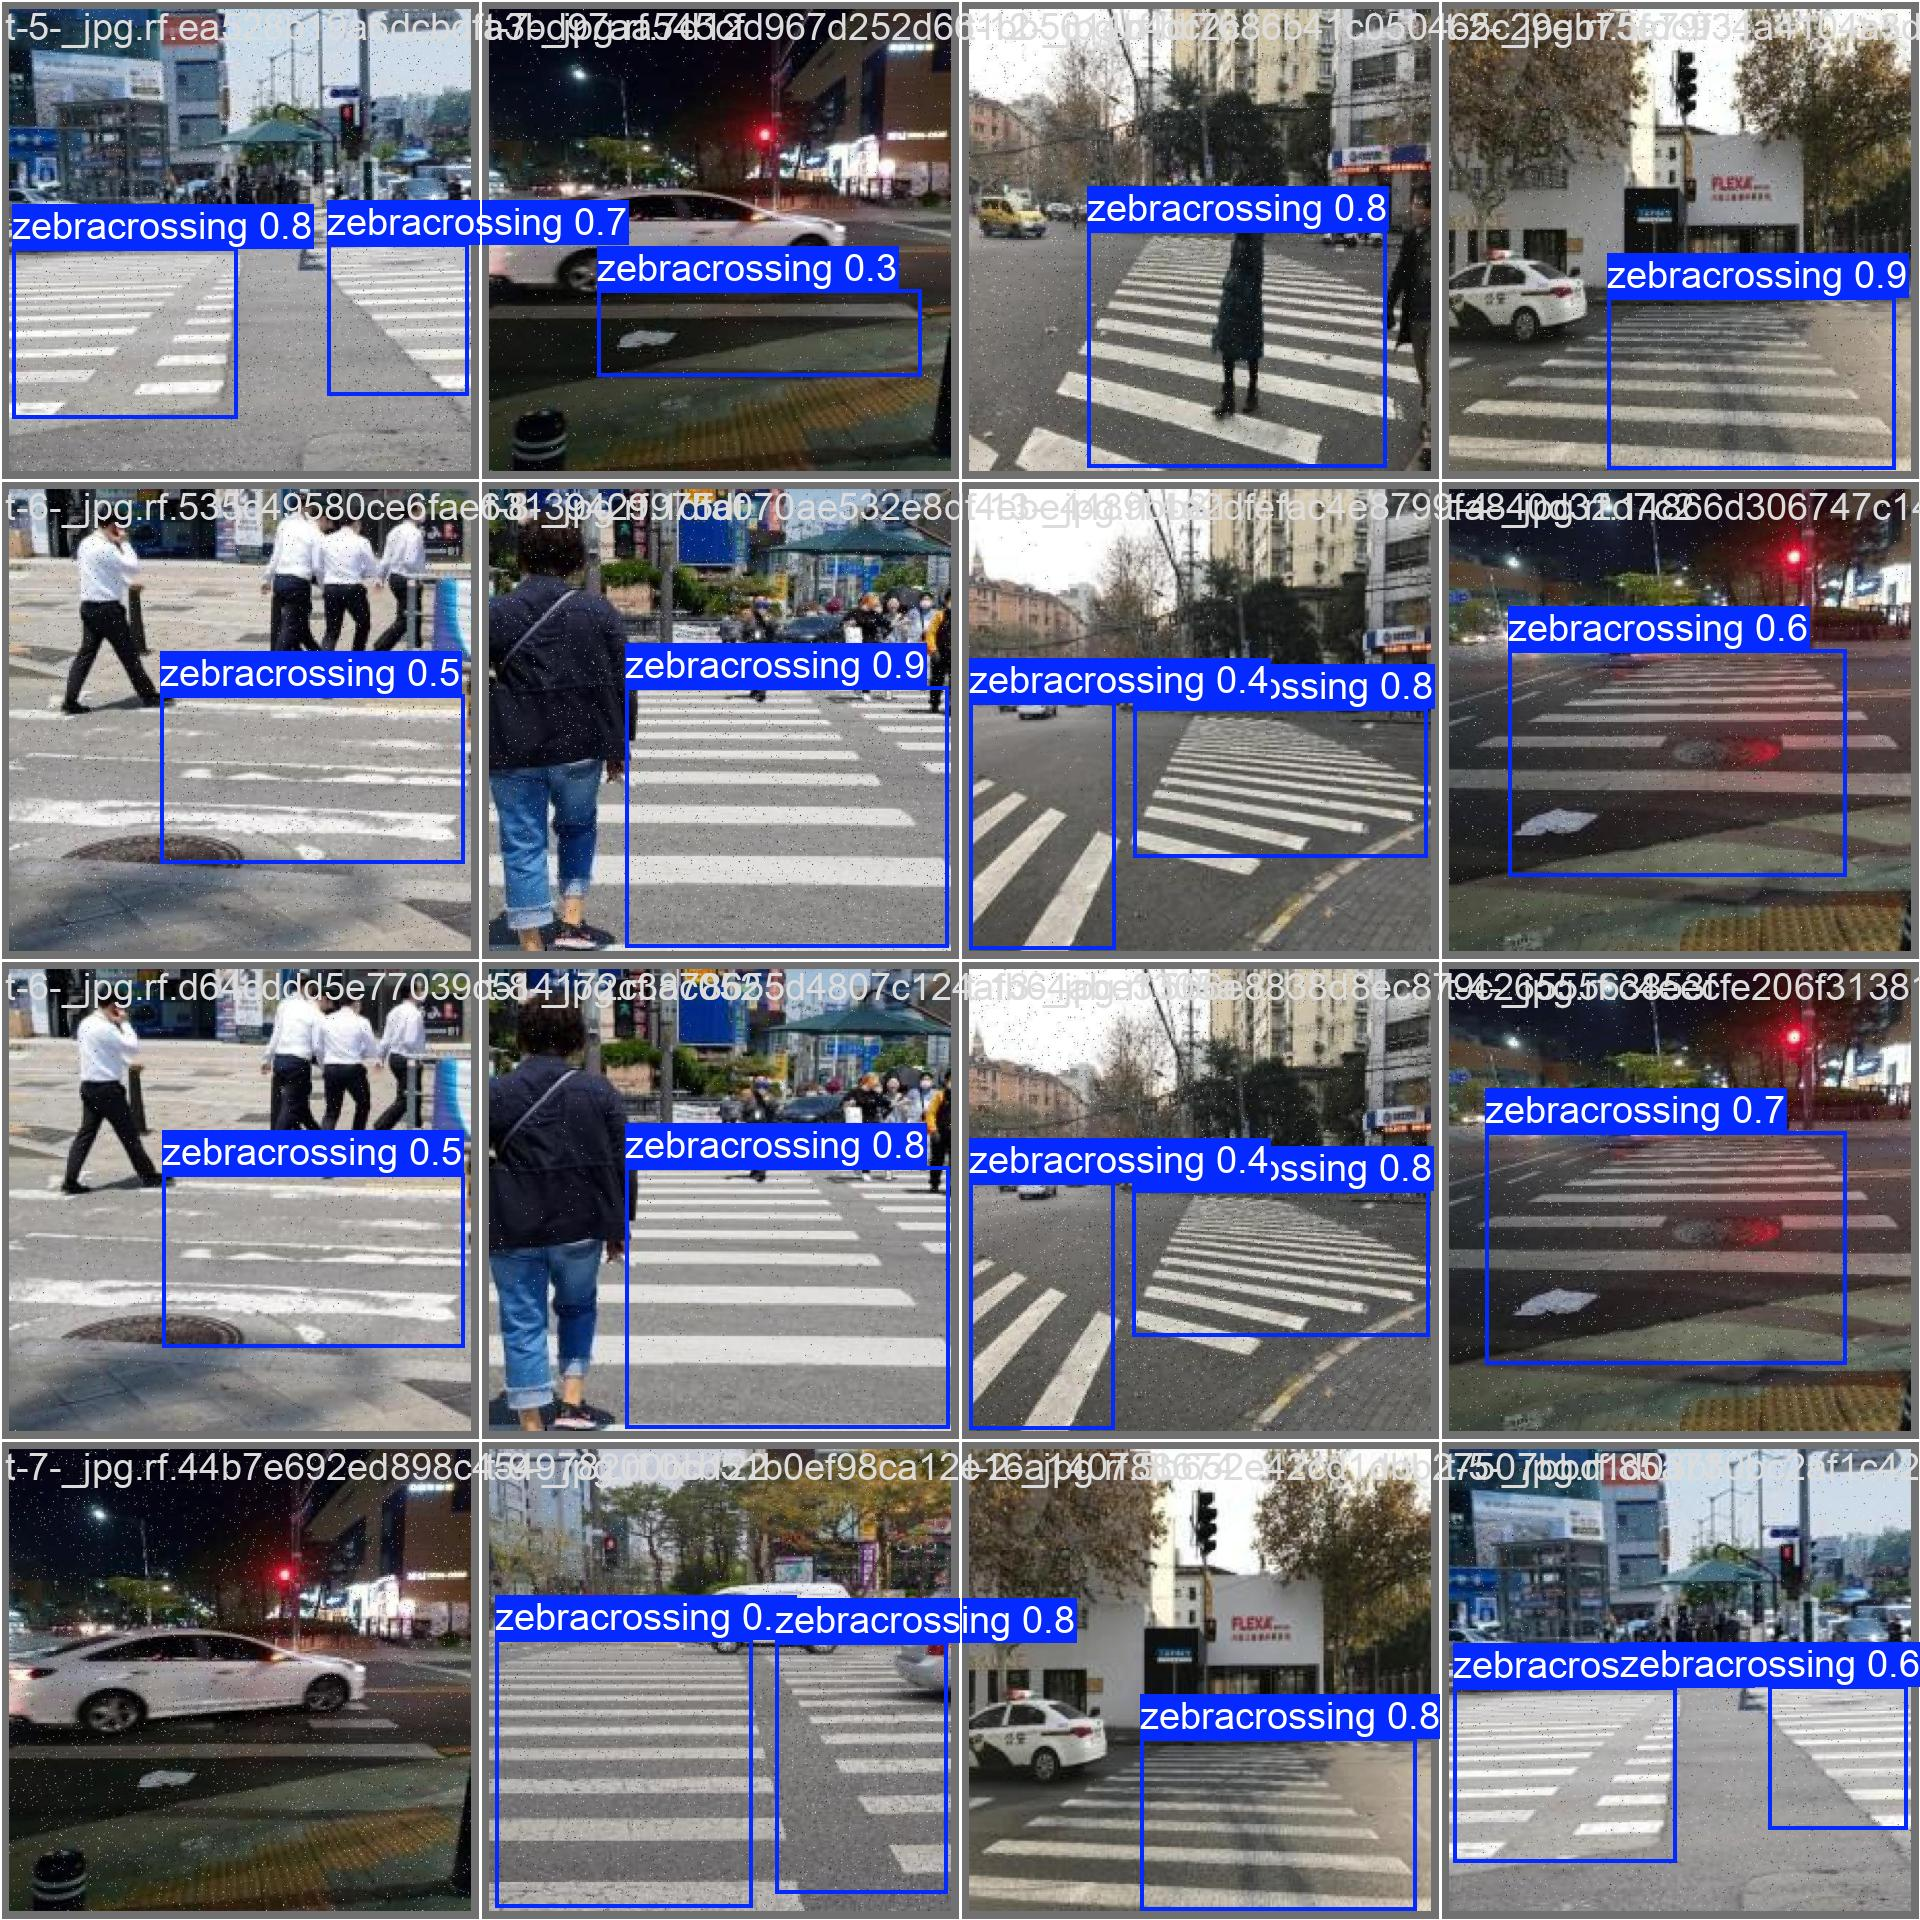

In [26]:
Image(filename=f'{HOME}/datasets/zebracrossing-1/runs/detect/final_training/val_batch0_pred.jpg', width=900)